# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [154]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import seaborn as sb
from matplotlib import pyplot as plt
sb.set_context("notebook", font_scale=1)
sb.set_style('whitegrid')

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 24.1 KB


In [156]:
# Display a description of the dataset
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Fresh,440,12000.297727,12647.328865,3,3127.75,8504.0,16933.75,112151
Milk,440,5796.265909,7380.377175,55,1533.00,3627.0,7190.25,73498
Grocery,440,7951.277273,9503.162829,3,2153.00,4755.5,10655.75,92780
Frozen,440,3071.931818,4854.673333,25,742.25,1526.0,3554.25,60869
Detergents_Paper,440,2881.493182,4767.854448,3,256.75,816.5,3922.00,40827
Delicatessen,440,1524.870455,2820.105937,3,408.25,965.5,1820.25,47943


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

#### Plotting the distribution to visualize outliers

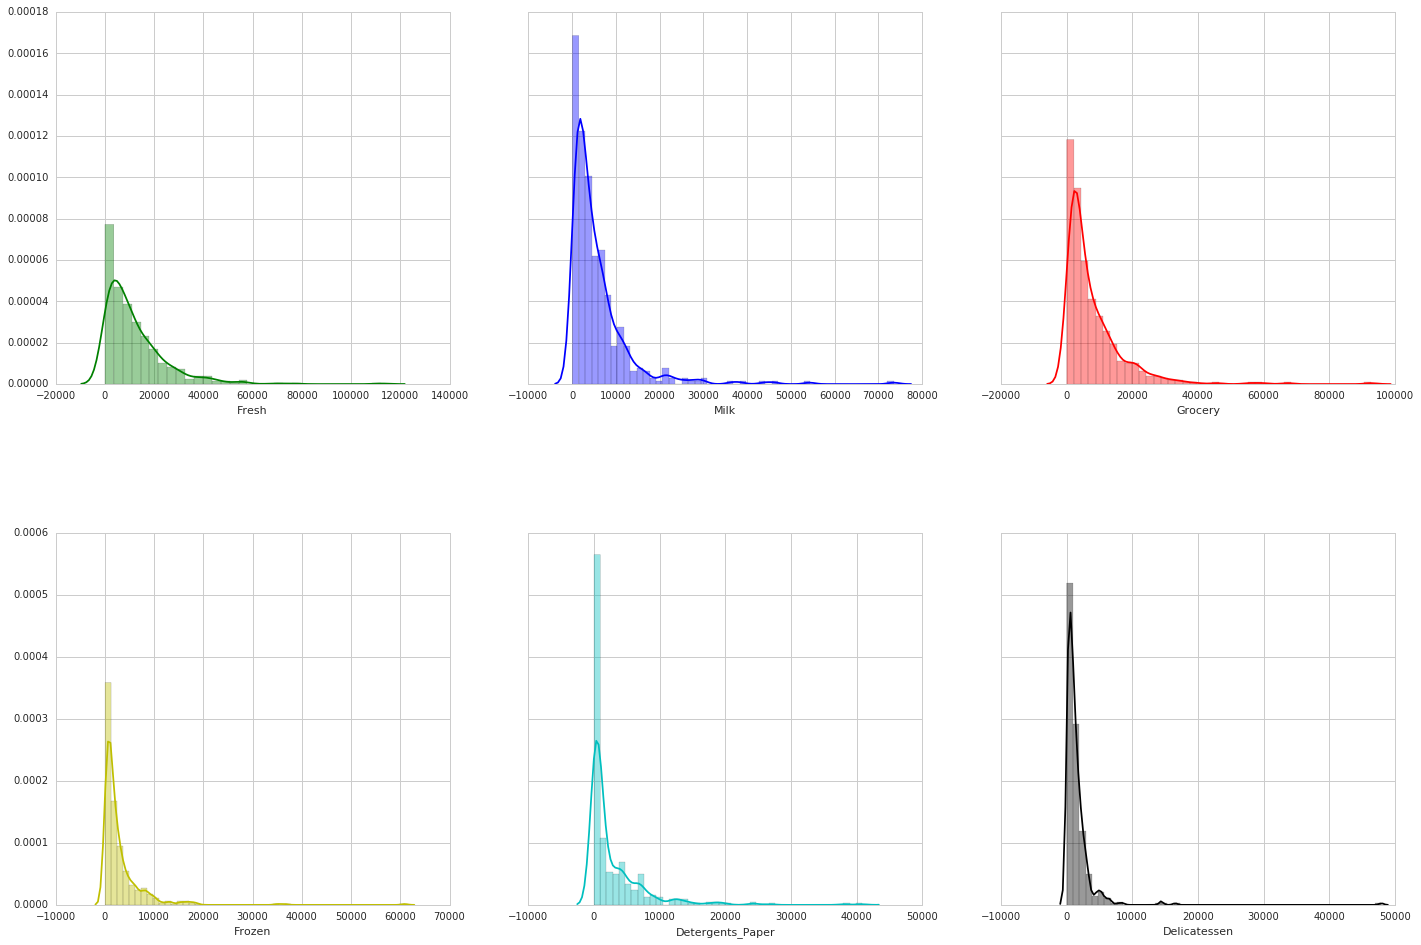

In [157]:
fig, ((axis1, axis2, axis3), (axis4, axis5,axis6)) = plt.subplots(2, 3, sharey='row',figsize=(24,16),gridspec_kw={'hspace':0.4})

sb.distplot(data['Fresh'], color="g", ax=axis1)
sb.distplot(data['Milk'], color="b", ax=axis2)
sb.distplot(data['Grocery'], color="r", ax=axis3)
sb.distplot(data['Frozen'], color="y", ax=axis4)
sb.distplot(data['Detergents_Paper'], color="c", ax=axis5)
sb.distplot(data['Delicatessen'], color="k", ax=axis6)

In [170]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [55,79,194]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5264,3683,5005,1057,2024,1130
1,1640,3259,3655,868,1202,1653
2,7107,1012,2974,806,355,1142


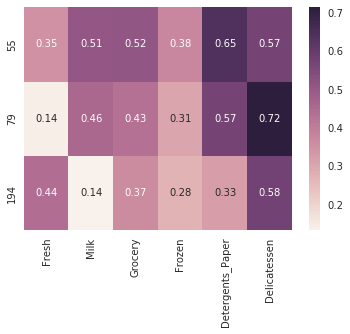

In [169]:
indices = [55,79,194]
samples_percentiles = data.rank(pct=True).iloc[indices]
sb.heatmap(samples_percentiles,annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Above, I've created a heatmap to visualize the amount of spending for each of the 6 features as percentiles. Rows correspond to data points and columns correspond to the amount of spending as percentiles relative to the whole data set. For instance, the first row and column can be interpreted as "35% of the customers spend less than customer 55 on fresh food".

My guesses for the 3 data poinds:
* Customer 55: You can see that customer 4 generally spends uniformly in all of the 6 categories, particularly on Retailer kind of establishments. I would guess that it is a retailer with a deli inside it.
* Customer 79: Like the first customer, this customer also spends about some amount on all categories with lower amount on Fresh food. This feels like an average-sized mom-and-pop store selling various kinds of food.
* Customer 194: This customer's spending is tilted towards Fresh items, Grocery and Delicatessen. This appears like as Deli food store.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

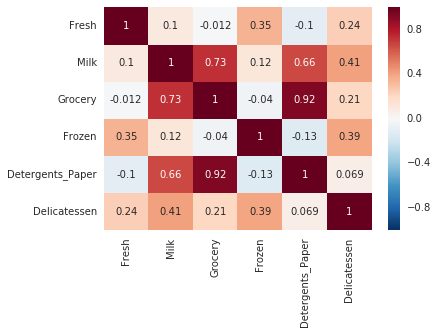

In [172]:
sb.heatmap(data.corr(),annot=True)

In [177]:
from sklearn.cross_validation import train_test_split
from sklearn import tree

for feature in data.columns.values:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature],axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = 0.2, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor()
    regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print "Score for " + feature + " is:" + str(score)

Score for Fresh is:-0.350615574307
Score for Milk is:0.360714615747
Score for Grocery is:0.6372134306
Score for Frozen is:0.280096753911
Score for Detergents_Paper is:0.753446432864
Score for Delicatessen is:-19.0408001802


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Answer: I thought I could just predict all of the features and compare the results. The features that can be predict with a reasonable R^2 score are Detergents paper (~75% accuracy) and Grocery (~63% accuracy). Based upon the heatmap above, I was expecting such results as well. If I really wanted to drop features these two would be my first choice, since the information is delivers seems to be contained to a large extend in the other features.

Other features like Fresh, Frozen or Delicatessen have very low scores. This indicates that their information is unique and not contained in the other features, which is why we should keep them. An alternative explanation for the low scores is that DecisionTrees are too bad at finding the relationships, in which case we should still keep the features as the relationship would be very hard to learn.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

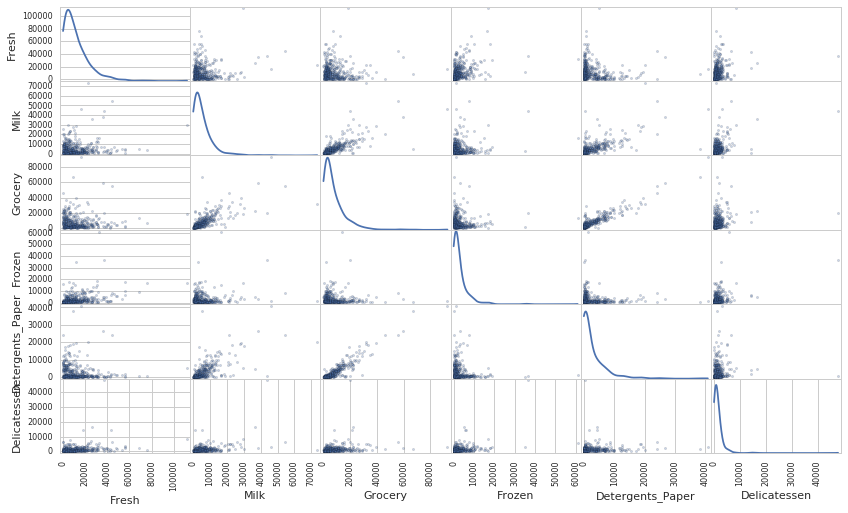

In [22]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

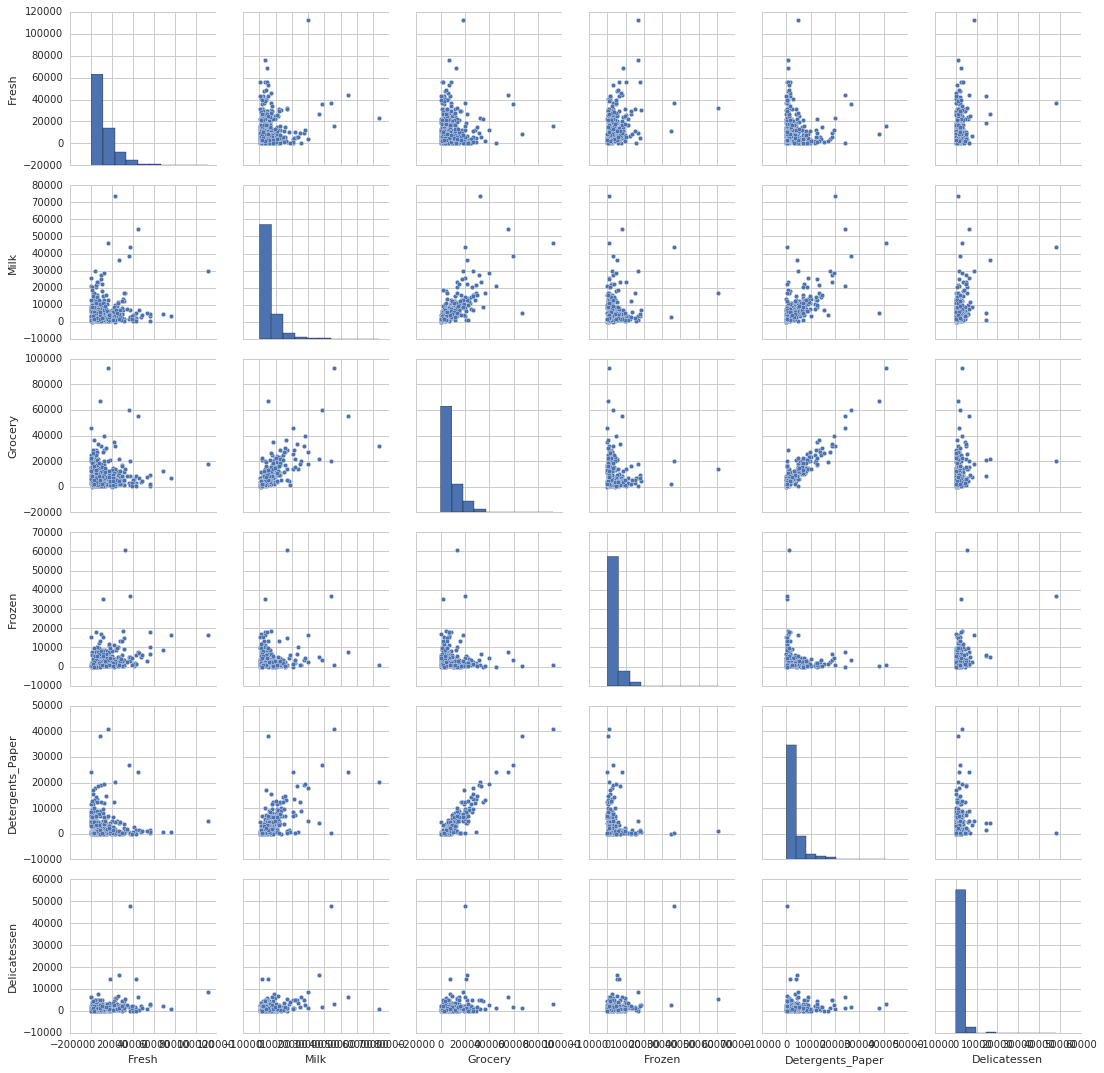

In [23]:
sb.pairplot(data, dropna=True,palette="muted")

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There are indeed some correlations visible in the scatter plots and heatmap above. The most visible one to be is that between Grocery and Detergents & Paper. These two features also happen to be the most predictable given all other features. There is also some correlation visible between Grocery and Milk as well as between Milk and Detergents & Paper. For the other pairs of features, there seems to be almost no correlation.

This confirms the results from the regressions above. Those features for which the RegressionTrees produced positive scores are also those which seem to be correlated.

The distributions for all features does not appear to be normal. Rather, all distributions have a spike at very low values and then drop quickly. I know two distributions which have a somewhat similar shape: log-normal and beta. To me, the log-normal distribution seems to be the best fit for the data. It has a clearer spike and drops off quicker than the beta distribution, we seems to be much more in line with the data we have. A log-normal distribution is also what you would expect for data describing amounts of money (For example, incomes of people are log-normal according to Wikipedia).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

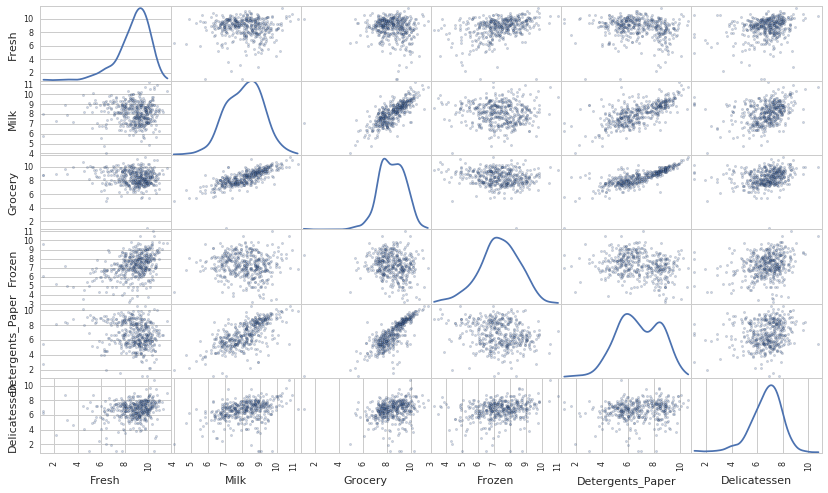

In [32]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

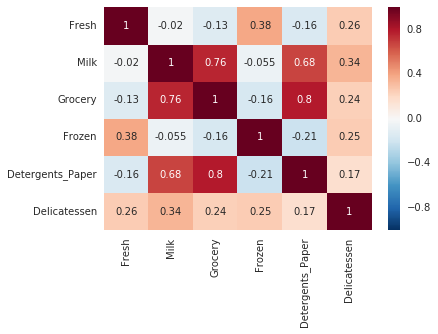

In [33]:
sb.heatmap(log_data.corr(),annot=True)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [34]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.568646,8.211483,8.518193,6.963190,7.612831,7.029973
1,7.402452,8.089176,8.203851,6.766192,7.091742,7.410347
2,8.868835,6.919684,7.997663,6.692084,5.872118,7.040536


In [36]:
log_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440,8.730544,1.480071,1.098612,8.048059,9.048286,9.737064,11.627601
Milk,440,8.121047,1.081365,4.007333,7.334981,8.196159,8.880480,11.205013
Grocery,440,8.441169,1.116172,1.098612,7.674616,8.467057,9.273854,11.437986
Frozen,440,7.301396,1.284540,3.218876,6.609678,7.330388,8.175896,11.016479
Detergents_Paper,440,6.785972,1.721020,1.098612,5.548101,6.705018,8.274341,10.617099
Delicatessen,440,6.665133,1.310832,1.098612,6.011875,6.872645,7.506728,10.777768


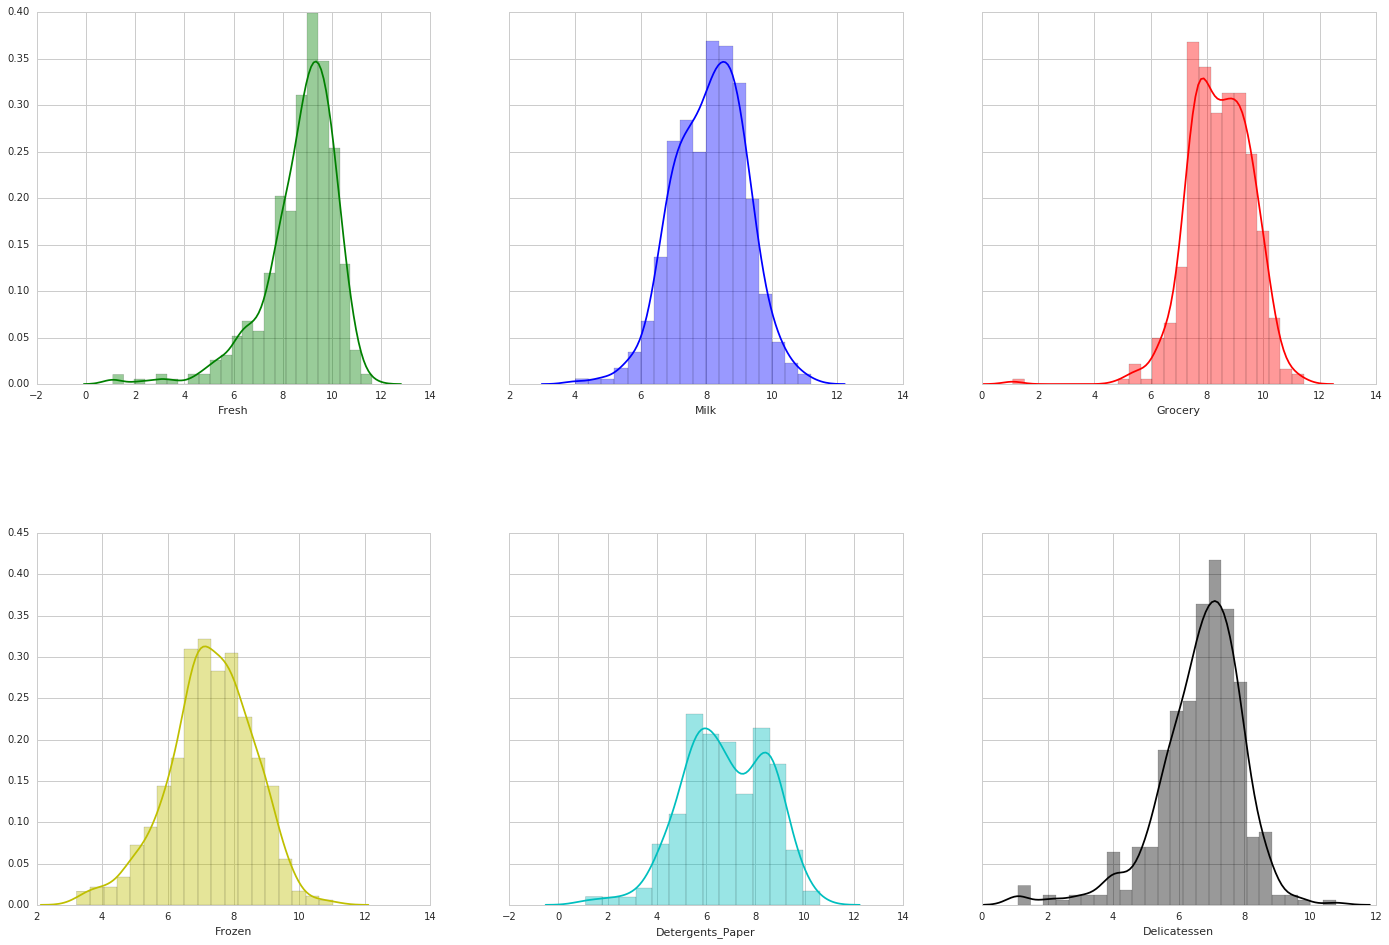

In [37]:
fig, ((axis1, axis2, axis3), (axis4, axis5,axis6)) = plt.subplots(2, 3, sharey='row',figsize=(24,16),gridspec_kw={'hspace':0.4})

sb.distplot(log_data['Fresh'], color="g", ax=axis1)
sb.distplot(log_data['Milk'], color="b", ax=axis2)
sb.distplot(log_data['Grocery'], color="r", ax=axis3)
sb.distplot(log_data['Frozen'], color="y", ax=axis4)
sb.distplot(log_data['Detergents_Paper'], color="c", ax=axis5)
sb.distplot(log_data['Delicatessen'], color="k", ax=axis6)

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [93]:
# For each feature find the data points with extreme high or low values
feature_outliers = {}
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    feature_outliers[feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    
    
# OPTIONAL: Select the indices for data points you wish to remove
for key in feature_outliers.keys():
    outliers = outliers + feature_outliers[key]

u, i = np.unique(outliers, return_inverse=True)
duplicate_outliers = u[np.bincount(i) > 1]

# Remove the outliers, if any were specified. This section is removing outliers that are common across multiple features
good_data = log_data.drop(log_data.index[duplicate_outliers]).reset_index(drop = True)


# Data with all outliers removed
outliers = np.unique(outliers).tolist()
good_data_with_all_outliers_removed = log_data.drop(log_data.index[outliers]).reset_index(drop = True)



#data with no outliers removed
good_data_all = log_data.copy()


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Visualising data after removing all the outliers

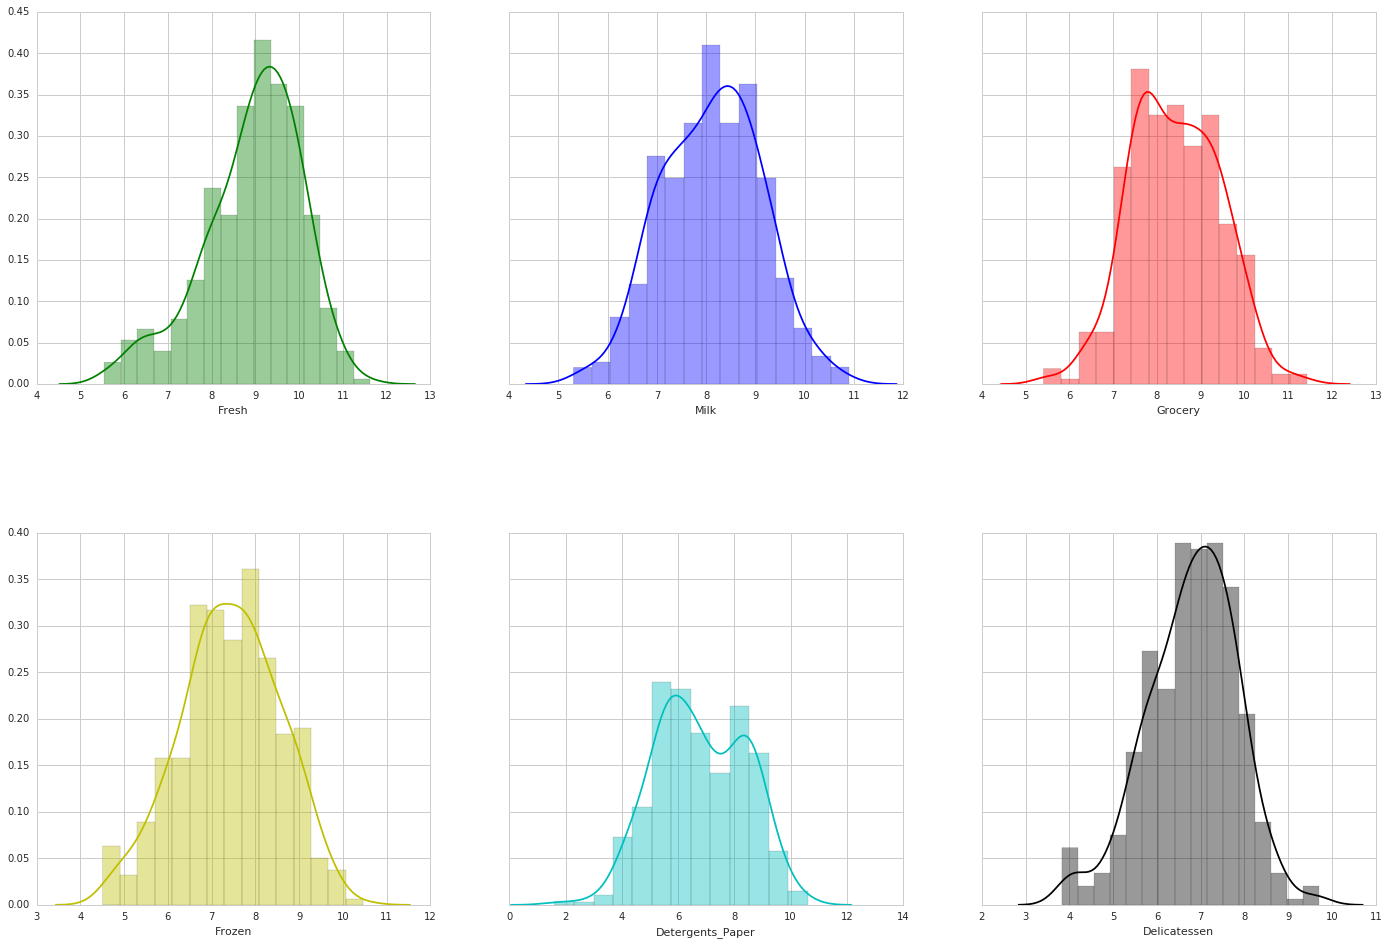

In [94]:
fig, ((axis1, axis2, axis3), (axis4, axis5,axis6)) = plt.subplots(2, 3, sharey='row',figsize=(24,16),gridspec_kw={'hspace':0.4})

sb.distplot(good_data_with_all_outliers_removed['Fresh'], color="g", ax=axis1)
sb.distplot(good_data_with_all_outliers_removed['Milk'], color="b", ax=axis2)
sb.distplot(good_data_with_all_outliers_removed['Grocery'], color="r", ax=axis3)
sb.distplot(good_data_with_all_outliers_removed['Frozen'], color="y", ax=axis4)
sb.distplot(good_data_with_all_outliers_removed['Detergents_Paper'], color="c", ax=axis5)
sb.distplot(good_data_with_all_outliers_removed['Delicatessen'], color="k", ax=axis6)

### Analyzing outiers that exist in multiple categories

In [95]:
log_data.iloc[duplicate_outliers.tolist()]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are 5 data points considered outliers for more than one feature. These are [65, 66, 75, 128,154]. My feeling is that it would be good to remove them from the dataset. If I apply k-means or a Gaussian Mixture Model later for clustering, the resultss could be distorted a lot by outliers since these methods are not particularly robust. To see why, consider the following arguments:

* K-means: we construct clusters by computing cluster-centers as the averages of all data points belonging to a cluster. Since the average is not a robust measure of centrality, outliers will have huge impacts.

* Gaussian Mixture Models: We fit multivariate normal distributions to describe clusters. Since the normal distribution's PDF drops off at an exponential rate, it is strongly affected by outliers.

In all cases, if we leave outliers in the dataset, they are likely to form "outlier clusters", i.e., clusters accomodate mostly for the outlier and may also contain some data points from the boundaries of real clusters.

As a sidenote: since we work with multivariate data, we could also apply a more sophisticated outlier detection method. Sklearn for instance offers at least two more options. One is fitting an elliptic envelope around the data, which more or less assumes the data is Multivariate Gaussian and unimodal. You would then treat those data points as outliers that are very far from the dataset's center in terms of Mahalanobis distance. The other method is using a one class SVM to describe the joint distribution. The advantage of that is that we can account for multimodal distributions.

For fun, I've tried these methods and plotted some results below. The first plot contains the 5 outliers indentified with their percentile information.

**Note - ** I have also saved dataframe with no outliers (good_data_all) removed and all outliers removed (good_data_with_all_outliers_removed) to see what's the implication of it on PCA and clustering.

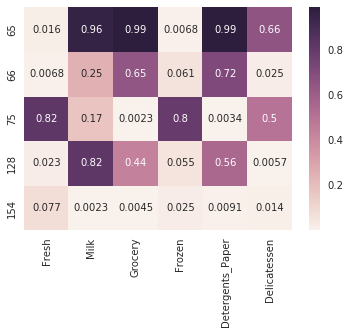

In [180]:
outliers_percentiles = data.rank(pct=True).iloc[duplicate_outliers.tolist()]
sb.heatmap(outliers_percentiles,annot=True)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [96]:
good_data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525



[ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


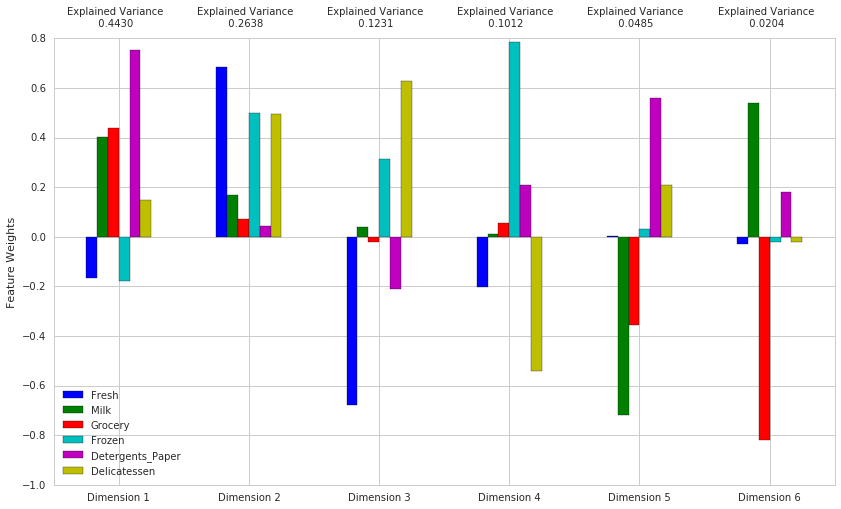

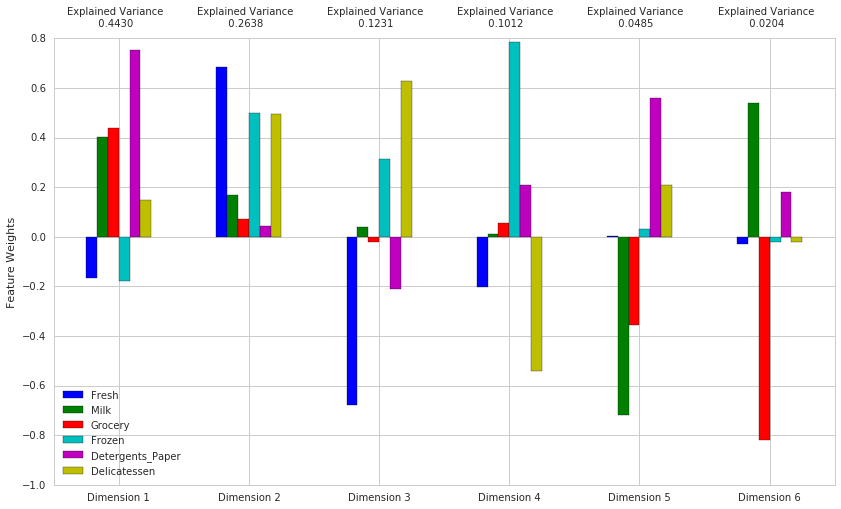

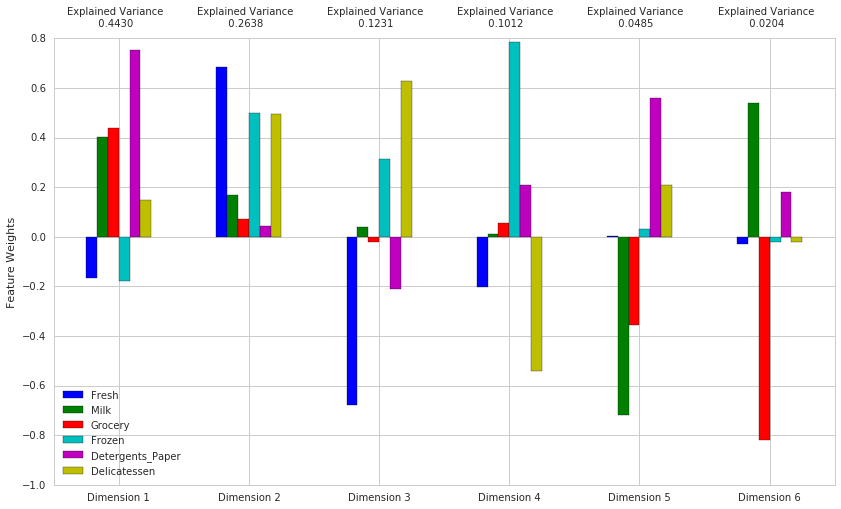

In [97]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results_all = vs.pca_results(good_data_all, pca)
pca_results_w_all_outliers_removed = vs.pca_results(good_data_with_all_outliers_removed, pca)
pca_results = vs.pca_results(good_data, pca)

# cumulative explaned variance
print '\n', np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The variance explained by the first 2 compoenents is 0.4430 + 0.2638 = 0.7068, i.e, ~70%. Using the first 4 features increases the amount to 0.4430 + 0.2638 + 0.1231 + 0.1012 = 0.9301, i.e., ~93%.

In the visualization above, we can see the linear coefficients of each feature for the components. High positive/negative values indicate that the corresponding features contributs a lot to the components value (in either positive or negative way). Low values mean that the feature has no impact. The first 4 components can thus be described as follows:

* Component 1: Significant positive weight is placed on Detergents & Paper (weight ~0.75) and meaningful weight is placed on Milk and Grocery (weights > 0.4). This component can be described as spending on retail goods.

* Component 2: Significant positive weight is placed on Fresh (weight ~0.7) and meaningful weight is placed on Frozen and Delicatessen (weights ~0.5). This component can be described as characteristic of restaurants and hotels with Deli food.

* Component 3: Significant positive weight is placed on Delicatessen (weight ~0.7) and meaningful weight is placed on Frozen (weight ~0.3). Strong negative weight is placed on Fresh (weight ~ -0.7). This component can be described as characteristic of retailers selling special Deli food.

* Component 4: Significant positive weight is placed on Frozen (weight ~0.8) and significant negative weight is placed on Delicatessen (weight - ~0.55). This component can be described as characteristic of spending on of-the-shelf Frozen goods.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [98]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,0.0026,-0.7192,-0.3554,0.0331,0.5582,0.2092
Dimension 6,0.0204,-0.0292,0.5402,-0.8205,-0.0205,0.1824,-0.0197


In [99]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8182,-0.0983,0.0612,-0.2506,0.4316,0.1523
1,0.5272,-0.8737,1.1397,-0.5016,0.4104,0.2797
2,-1.2369,-0.3496,0.1058,-0.9410,0.5681,-0.4392


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [133]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

## creating PCA for data with no outliers removed and all outliers removed
reduced_data_all = pca.transform(good_data_all)
reduced_data_with_all_outliers_removed = pca.transform(good_data_with_all_outliers_removed)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data_all = pd.DataFrame(reduced_data_all, columns = ['Dimension 1', 'Dimension 2'])
reduced_data_with_all_outliers_removed = pd.DataFrame(reduced_data_with_all_outliers_removed, columns = ['Dimension 1', 'Dimension 2'])

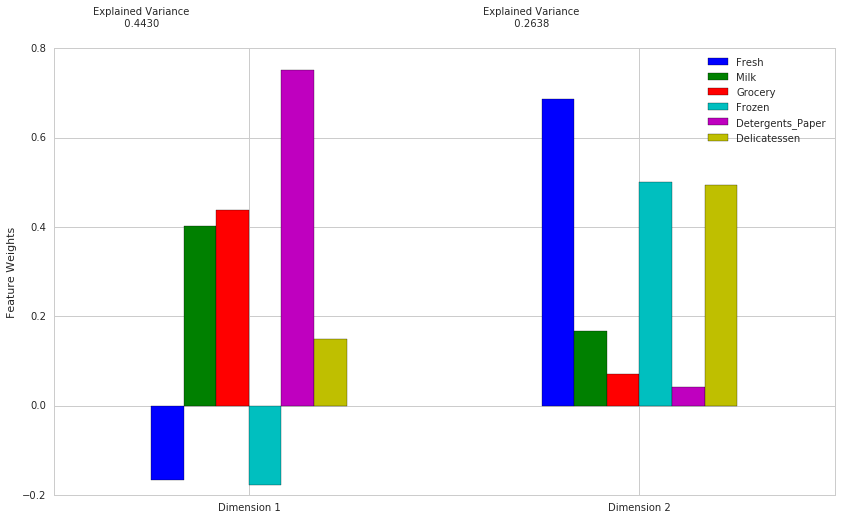

In [134]:
pca_results = vs.pca_results(good_data, pca)

In [135]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [136]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.8182,-0.0983
1,0.5272,-0.8737
2,-1.2369,-0.3496


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

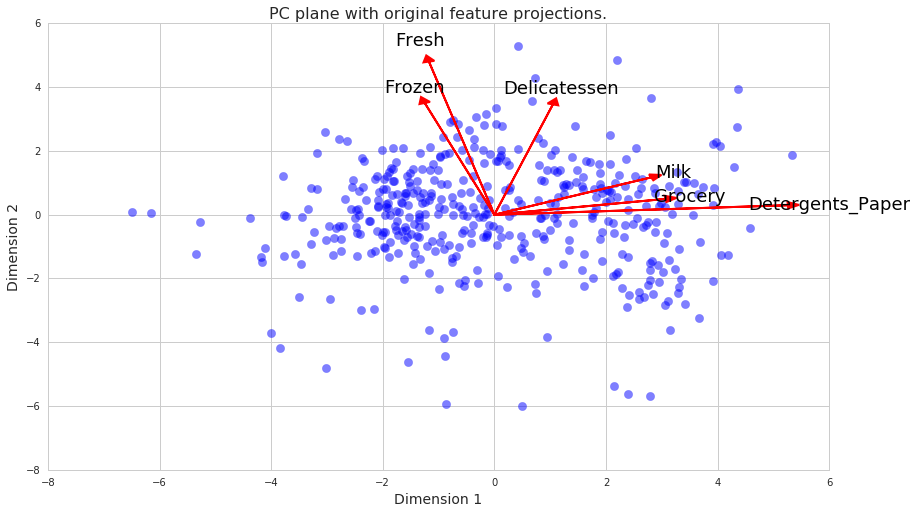

In [108]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

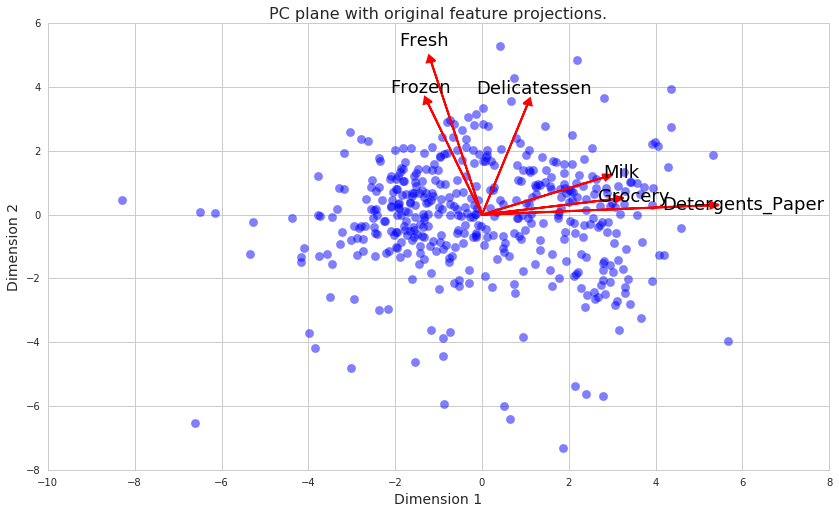

In [137]:
# Create a biplot with no outliers removed
vs.biplot(good_data_all, reduced_data_all, pca)

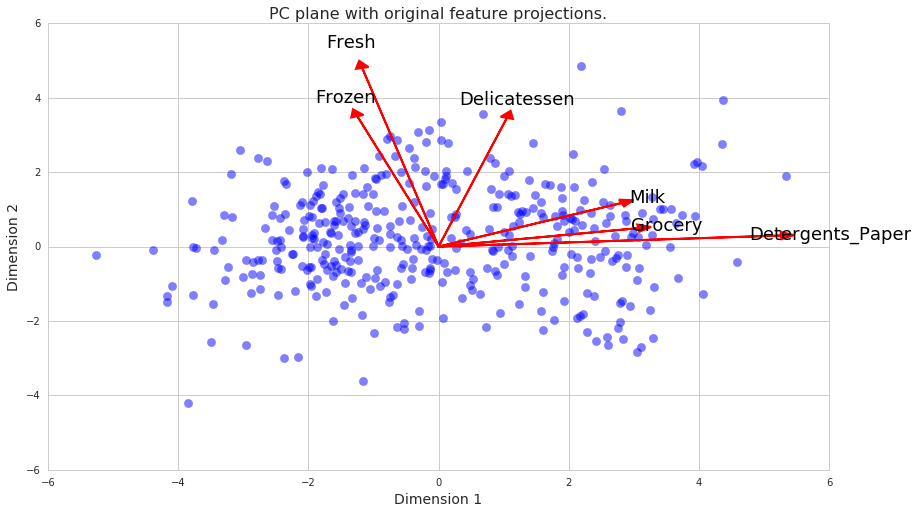

In [138]:
# Create the biplot with all outliers removed
vs.biplot(good_data_with_all_outliers_removed, reduced_data_with_all_outliers_removed, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

In general, the advantange of Gaussian Mixture Models (GMMs) over k-means is that GMMs deliver a soft-assignment of clusters. That is, each data point is assigned a probability for each cluster, indicating how likely it belongs to the cluster. K-means only provides hard assignments, i.e., it chooses a single cluster for each data point. GMMs can also fit more complex cluster shapes since each mixture component can freely fit its covariance matrix. K-means assigns data poins to the closest cluster in terms of Euclidian distance. Thus, it treats distances in all directions equally.

The advantage of k-means comapred to GMMs is that it is much faster. For GMMs, many parameters must be fitted to the data (quadratic in the number of features) while k-means only maintains cluster centers (linear in number of features). Therefore k-means will be much quicker to train.

It is possible to make GMMs a lot more scalabe by constraining the covariance matrices of the mixture components. Usually, it is useful to use diagonal matrixes so that the number of paramters grows linear with the number of features. Going even furhter, you can also use isotropic covariance matrices, which a multiples of the identity matrix (i.e., have only one free parameter). While these constraints make GMMs more scalabe, they also reduce some of the benefits. K-means can be seen as a special (limit) case of GMMs, specifically as GMM with diagonal, equal and small covariance matrices. Hence, if you constrain the covariance matrices a lot, you will get results similar to k-means.

Since the dataset it not too huge, I will go for either GMMs or k-means. Actually, I ran a comparison on both algorithim to see which one works better (see below). Since k-means got a better score, I went with k-means.

In [146]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
    
def score_clustering(data, num_clusters):
    preds, _, _  = cluster(data, num_clusters)
    score = silhouette_score(data, preds)
    return score

def cluster(data, num_clusters):
    clusterer = GMM(n_components=num_clusters, covariance_type='full', random_state=42).fit(data)
    preds = clusterer.predict(data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds

print "Printing scores for data with dupplicate/common(across features) outliers removed - \n"

for num_clusters in range(2,10):
    score = score_clustering(reduced_data, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))

print "\nPrinting scores for data with no outlier removed - \n"
    
for num_clusters in range(2,10):
    score = score_clustering(reduced_data_all, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))

print "\nPrinting scores for data with all outliers removed - \n"

for num_clusters in range(2,10):
    score = score_clustering(reduced_data_with_all_outliers_removed, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))

Printing scores for data with dupplicate/common(across features) outliers removed - 

num_clusters: 2 - score: 0.41174985628
num_clusters: 3 - score: 0.398431881066
num_clusters: 4 - score: 0.289413783858
num_clusters: 5 - score: 0.191037489429
num_clusters: 6 - score: 0.296321087791
num_clusters: 7 - score: 0.310556696486
num_clusters: 8 - score: 0.206249919416
num_clusters: 9 - score: 0.178273547341

Printing scores for data with no outlier removed - 

num_clusters: 2 - score: 0.402515188664
num_clusters: 3 - score: 0.385482223852
num_clusters: 4 - score: 0.352296643331
num_clusters: 5 - score: 0.207175874286
num_clusters: 6 - score: 0.286265010437
num_clusters: 7 - score: 0.296451710942
num_clusters: 8 - score: 0.182285853252
num_clusters: 9 - score: 0.174501117637

Printing scores for data with all outliers removed - 

num_clusters: 2 - score: 0.443614007552
num_clusters: 3 - score: 0.365067808079
num_clusters: 4 - score: 0.266692852653
num_clusters: 5 - score: 0.26567457977
num_cl

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
    
def score_clustering(data, num_clusters):
    preds, _, _  = cluster(data, num_clusters)
    score = silhouette_score(data, preds)
    return score

def cluster(data, num_clusters):
    clusterer = KMeans(n_clusters=num_clusters, random_state=42).fit(data)
    preds = clusterer.predict(data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds

print "Printing scores for data with dupplicate/common(across features) outliers removed - \n"

for num_clusters in range(2,10):
    score = score_clustering(reduced_data, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))


print "\nPrinting scores for data with no outlier removed - \n"
    
for num_clusters in range(2,10):
    score = score_clustering(reduced_data_all, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))

print "\nPrinting scores for data with all outliers removed - \n"

for num_clusters in range(2,10):
    score = score_clustering(reduced_data_with_all_outliers_removed, num_clusters)
    print("num_clusters: {} - score: {}".format(num_clusters, score))


Printing scores for data with dupplicate/common(across features) outliers removed - 

num_clusters: 2 - score: 0.426281015469
num_clusters: 3 - score: 0.39689092645
num_clusters: 4 - score: 0.331841276009
num_clusters: 5 - score: 0.349997797526
num_clusters: 6 - score: 0.365885220633
num_clusters: 7 - score: 0.364801207979
num_clusters: 8 - score: 0.367640756491
num_clusters: 9 - score: 0.359879014605

Printing scores for data with no outlier removed - 

num_clusters: 2 - score: 0.419249062681
num_clusters: 3 - score: 0.393736789777
num_clusters: 4 - score: 0.330250767883
num_clusters: 5 - score: 0.35095904557
num_clusters: 6 - score: 0.349538699935
num_clusters: 7 - score: 0.351050247348
num_clusters: 8 - score: 0.359550769261
num_clusters: 9 - score: 0.359620153258

Printing scores for data with all outliers removed - 

num_clusters: 2 - score: 0.448774192345
num_clusters: 3 - score: 0.350840767966
num_clusters: 4 - score: 0.329781840136
num_clusters: 5 - score: 0.351641408094
num_cl

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [117]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

You can see the silhouette scores above. Higher scores are better and the highest of all scores was found for 2 clusters. Since the scores kept dropping for higher numbers, I did not expect to find better scores for larger numbers of clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

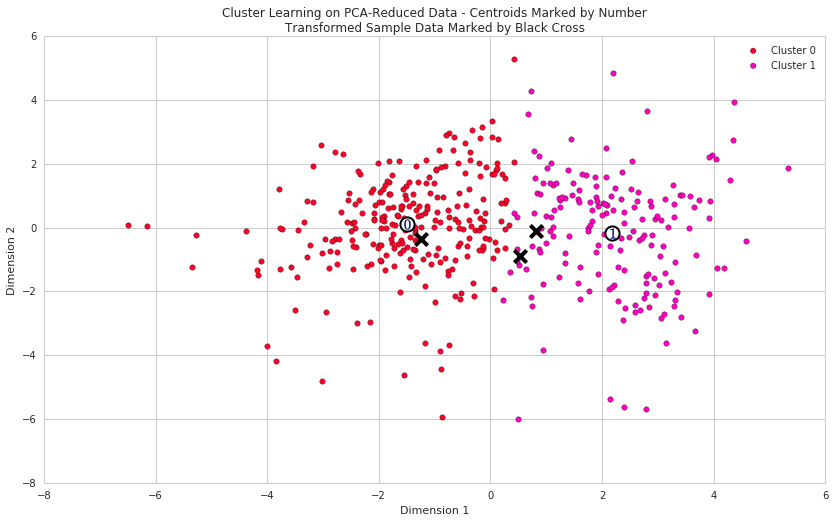

In [118]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

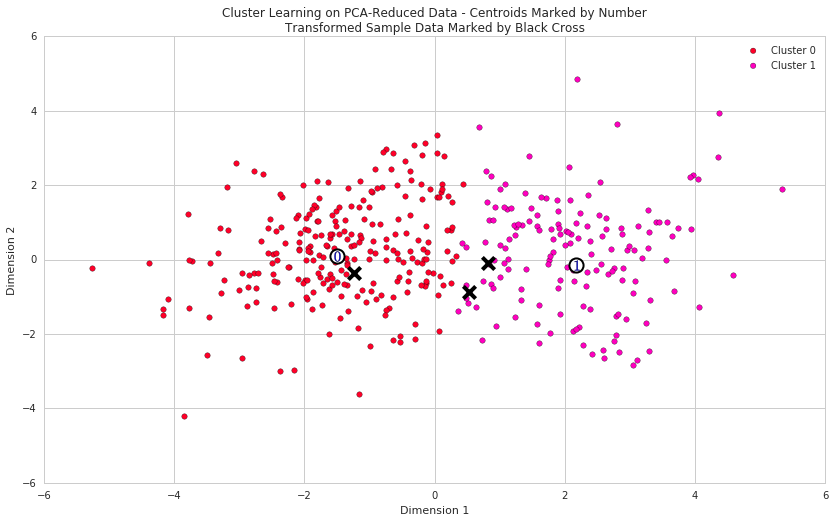

In [148]:
# TODO: Predict the cluster for each data point
preds_with_all_outliers_removed = clusterer.predict(reduced_data_with_all_outliers_removed)

# TODO: Find the cluster centers
centers_with_all_outliers_removed = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_with_all_outliers_removed,preds_with_all_outliers_removed)
vs.cluster_results(reduced_data_with_all_outliers_removed, preds_with_all_outliers_removed, centers_with_all_outliers_removed, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [149]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867,1897,2477,2088,294,681
Segment 1,4005,7900,12104,952,4561,1036


In [191]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440,12000.297727,12647.328865,3,3127.75,8504.0,16933.75,112151
Milk,440,5796.265909,7380.377175,55,1533.00,3627.0,7190.25,73498
Grocery,440,7951.277273,9503.162829,3,2153.00,4755.5,10655.75,92780
Frozen,440,3071.931818,4854.673333,25,742.25,1526.0,3554.25,60869
Detergents_Paper,440,2881.493182,4767.854448,3,256.75,816.5,3922.00,40827
Delicatessen,440,1524.870455,2820.105937,3,408.25,965.5,1820.25,47943


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 has higher spendings on Fresh and Frozen, below-average spendings on Milk, Grocery and Detergents & Paper and somewhat average spendings on Delicatessen. This could be a profile of restaurants selling mostly fresh food but also a bit of frozen food as well as Delicatessen. Segment 1 has higher spendings on Milk, Grocery and Detergents & Paper, low spendings on Fresh food and average spendings on Delicatessen. This could be the profile of a retail store.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [150]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

**Sample point 0:** My guess earlier was this would be a retailer, now it is assigned to the cluster which I consider retailer. Thus, my prediction was in line with the clustering.

**Sample point 1:** My guess was this would be a small mom-and-pop retail store, now it is assigned to the cluster which I consider to be retail stores. For this data points, my prediction wa therefore in line with the clustering.

**Sample point 2:** My guess was this would be a deli restaurant and it is also assigned to the restaurant cluster. Again, my prediction was in line with the clustering.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

I can think of two theories one could have:

** No fresh food theory: ** You could reduce the delivery frequency for customers segment retailers since it is not ordering a lot of fresh food. Since fresh food should be fresh and therefore delivered often, these customers would likely react negative to reduced delivery frequency. Customers from retailers segment may not care that much (provided they can store a sufficient amount of food).

** Retail does not like stocks theory:** Retailers usually like it a lot to be able to quickly adapt to changing demands and also to minimize inventory to save cost. Thus, they could react negatively to reduced delivery frequency. Restaurants may not be as sensitive to inventory.

Unfortunately, both theories predict negative effects for one or the other customer segment. Only an A/B test will tell if actually any of the segments will actually not react negative.

In terms of the question wording, I actually cannot think of a reason why any customer would react positively, since we talk about a reduction of service level with no compensation. If cost saving are transferred (patially) to the customers, they may.

I would do the A/B test by selecting a random sample from each cluster and reducing the delivery frequency for each of them (and maybe reduce prices a little). Talking to the selected customers after one or two weeks and asking for their happiness will provide a quantitataive score of customer satisfaction. An equally sized control group selected from the remaining customers should also be contacted to get a comparison score.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

I can see two different ways to assign new customers to a segment:

* Use the clustering algorithm itself to create the assignment: Both k-means and GMMs perform during training some kind of E-step in which they assign data points to clusters based on the current parameters for the clustering. We could keep the cluster parametrization fixed and perform these E-steps for the new data points to include them into the clustering (without changing the clusters themselves).

* Use a supervised learning algorithm to "learn" how to distingusish between clusters: You could interpret the cluster assignments as labels for a supervised learning algorithm. If the algorithm is sufficiently good at reproducing the cluster assignments, it will also do a good job at assigning cluster labels to new data points.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

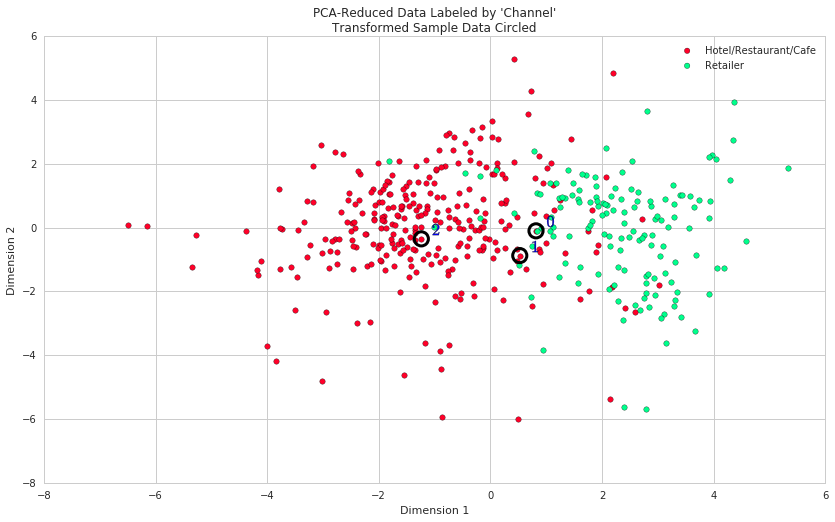

In [151]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, duplicate_outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

It seems to perform quite well since 2 clusters are what the shilouette score recommended to use and, coincidentally, 2 clusters are what the creators of the dataset grouped the customers into. The clustering is consistent with what I suspected earlier about the data.

Regarding data points that could be classified as purely one or the other segment, there are some data points of this kind. Most data points though are somewhat ambiguous and do not clearly belong to one cluster or the other. There is considerable overlap in the true distribution.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.